In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
app_train = pd.read_csv('../data/raw/application_tr.csv')

print(app_train.shape)

app_train.head()


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
app_train.isnull().sum().sort_values(ascending=False).head(55)


COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [5]:
app_train["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [6]:
categorical_cols = app_train.select_dtypes(include=["object"]).columns
numerical_cols = app_train.select_dtypes(exclude=["object"]).columns

print("Categóricas:", len(categorical_cols))
print("Numéricas:", len(numerical_cols))

Categóricas: 16
Numéricas: 106


ANÁLISIS EXPLORATORIO - HOME CREDIT DEFAULT RISK

📊 DIMENSIONES
Train: (307511, 122)
Test: (48744, 121)

ANÁLISIS DEL TARGET

Distribución del TARGET:
  0 (Pagó bien): 282,686 (91.93%)
  1 (Dificultades): 24,825 (8.07%)

⚠️  DATASET DESBALANCEADO - Ratio: 11.4:1

ANÁLISIS DE VALORES FALTANTES

Variables con missing: 67 de 122

Top 15 variables con más missing:
                          Missing_Count  Missing_Pct
COMMONAREA_AVG                   214865    69.872297
COMMONAREA_MODE                  214865    69.872297
COMMONAREA_MEDI                  214865    69.872297
NONLIVINGAPARTMENTS_MEDI         213514    69.432963
NONLIVINGAPARTMENTS_MODE         213514    69.432963
NONLIVINGAPARTMENTS_AVG          213514    69.432963
FONDKAPREMONT_MODE               210295    68.386172
LIVINGAPARTMENTS_AVG             210199    68.354953
LIVINGAPARTMENTS_MEDI            210199    68.354953
LIVINGAPARTMENTS_MODE            210199    68.354953
FLOORSMIN_MODE                   208642    67.848630
F

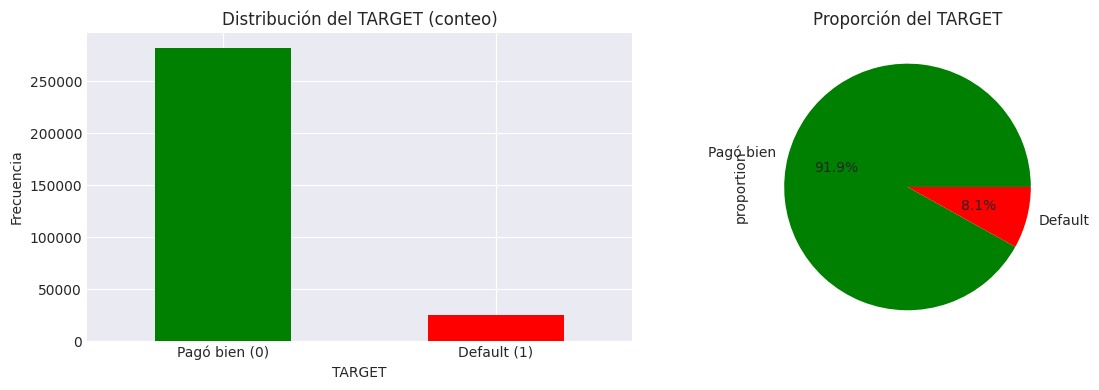

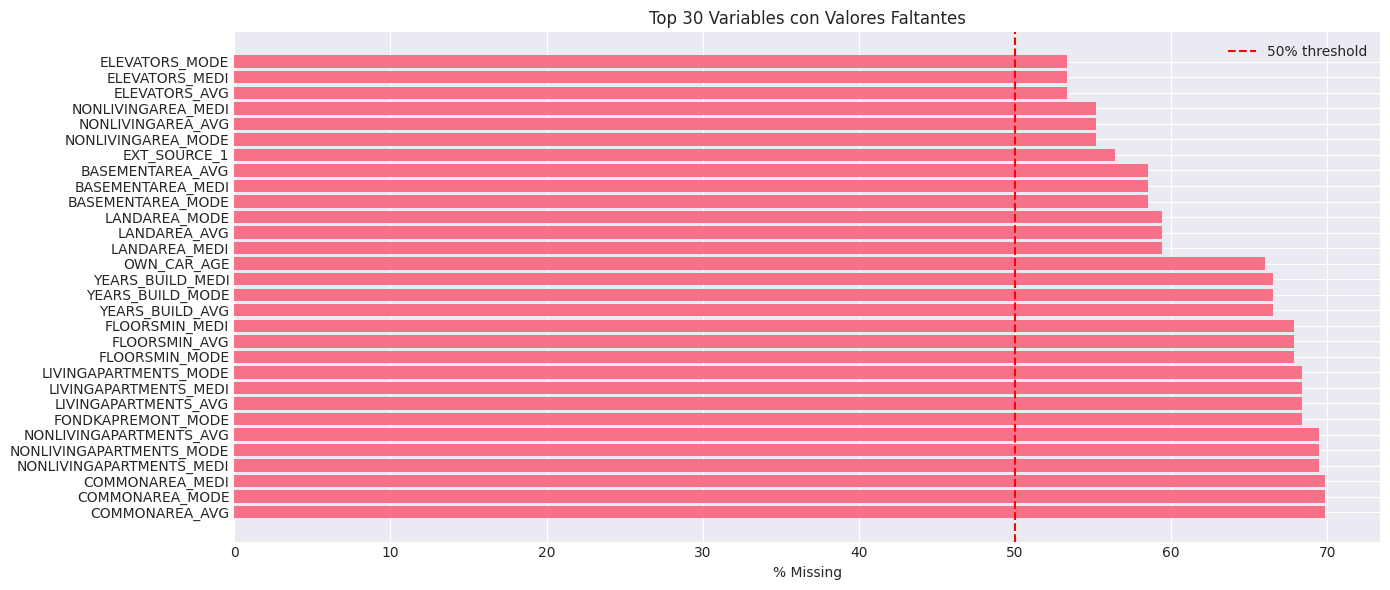

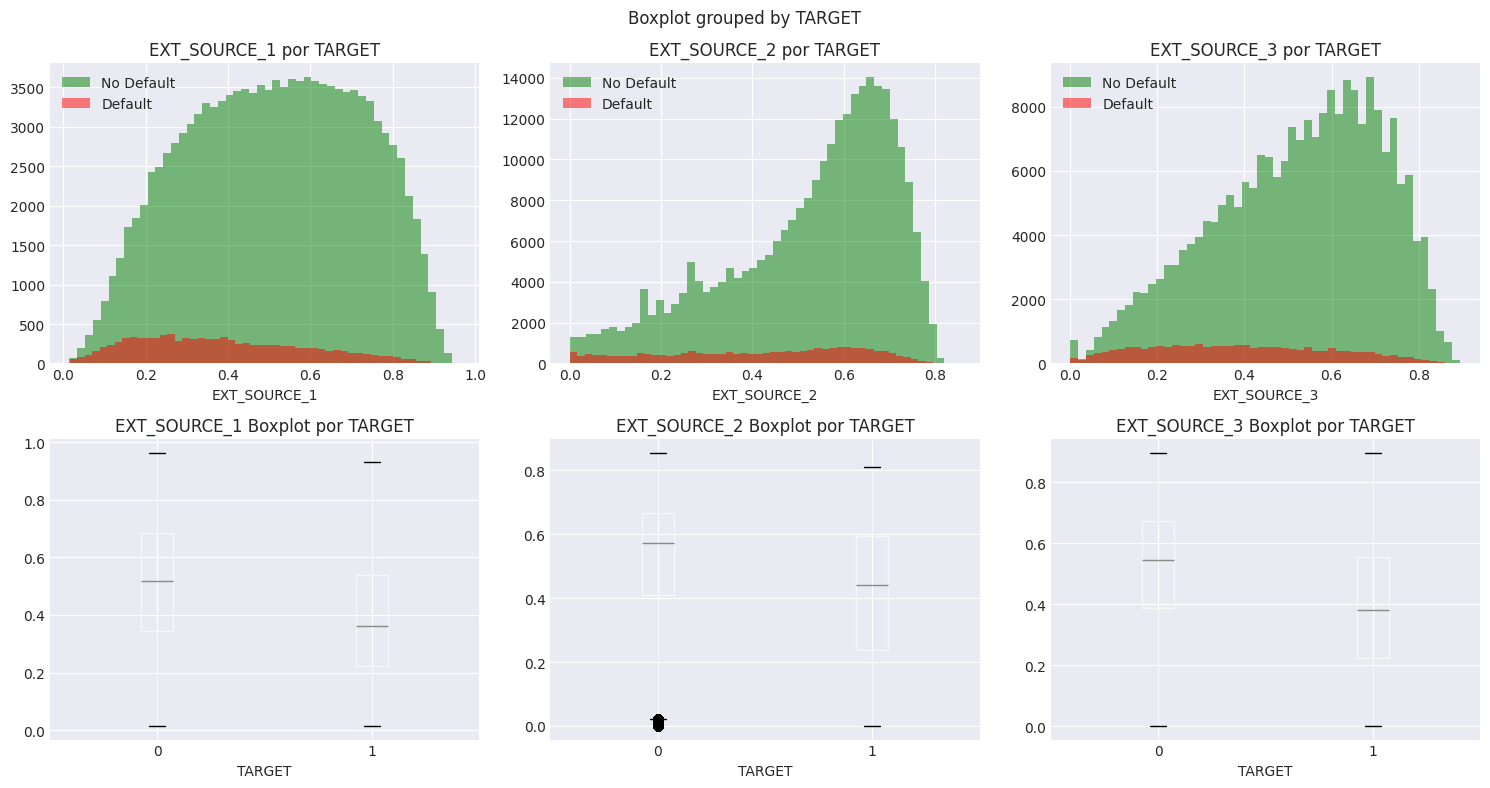

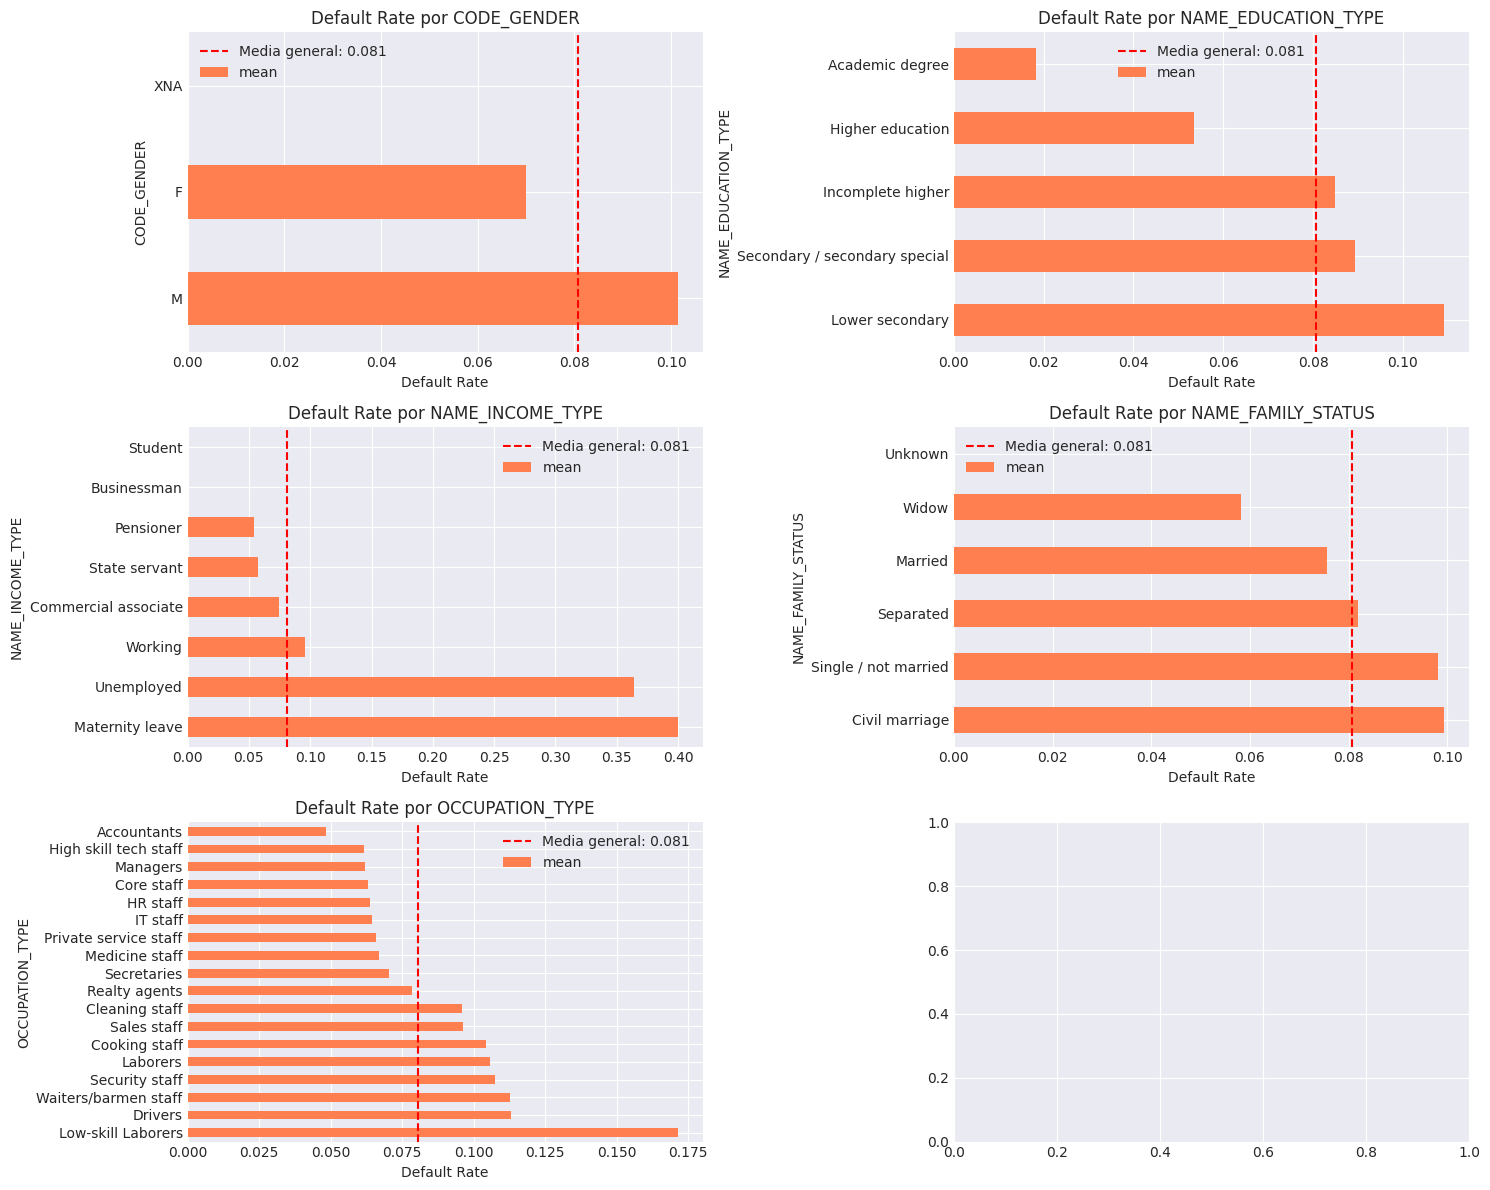

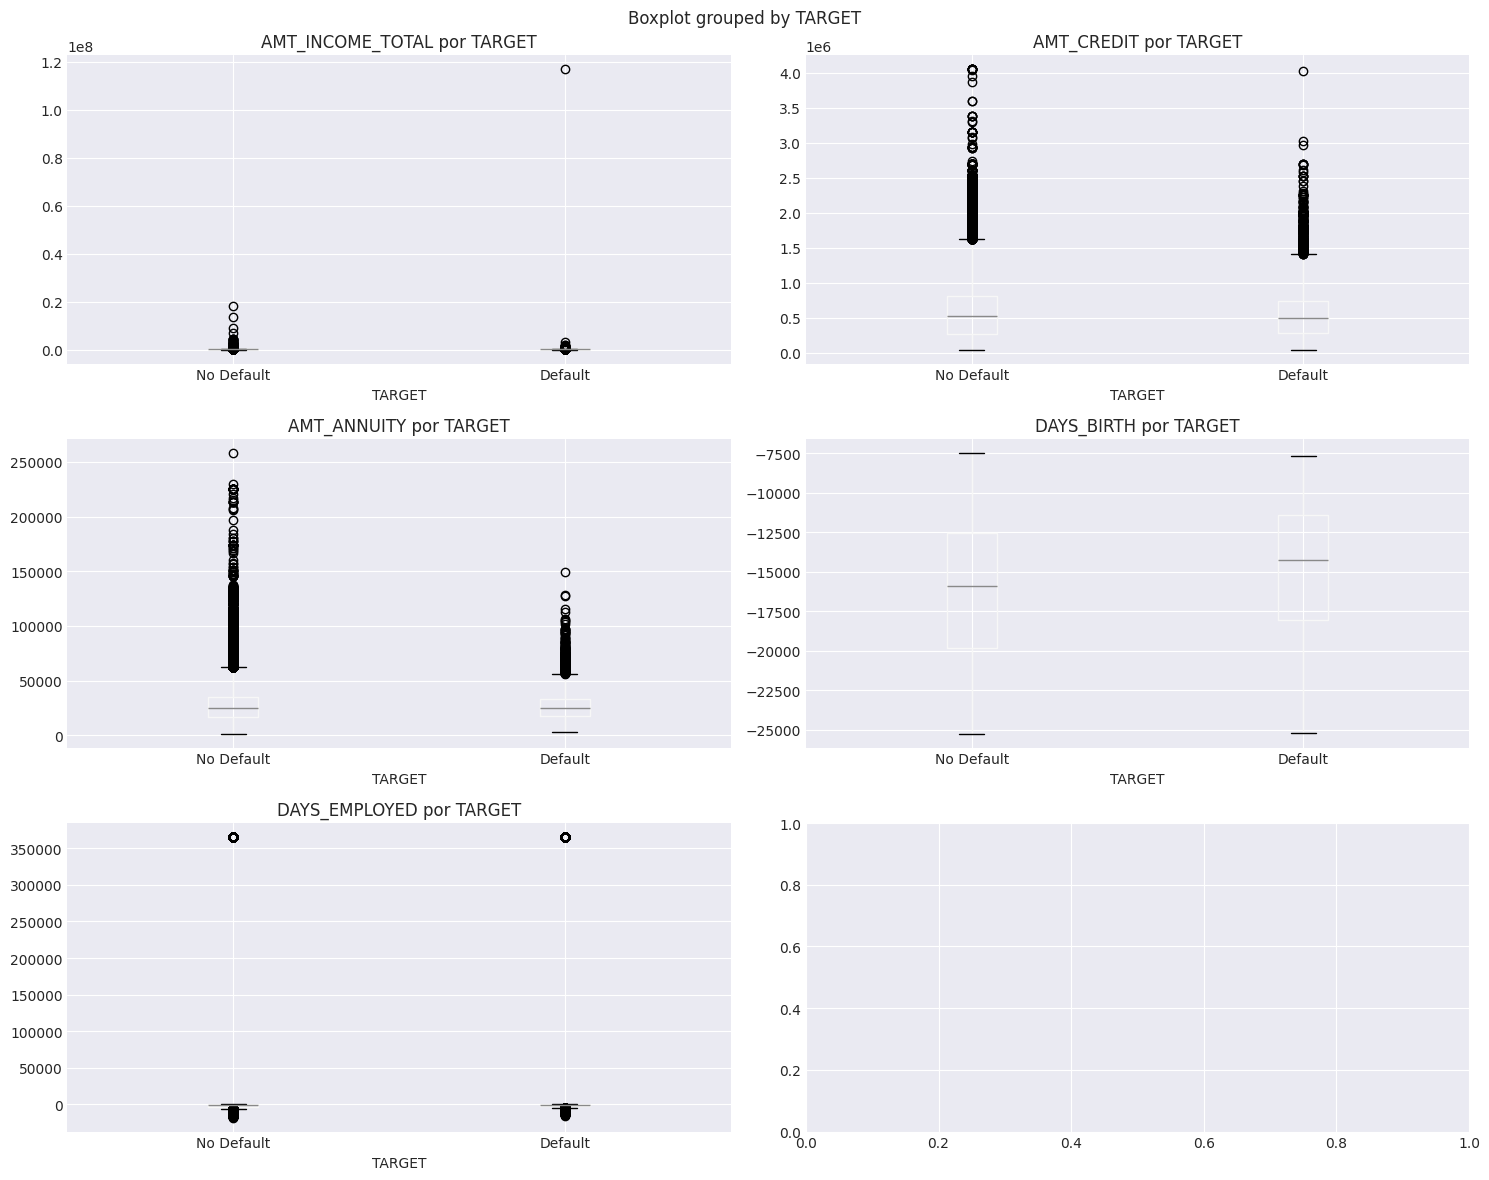

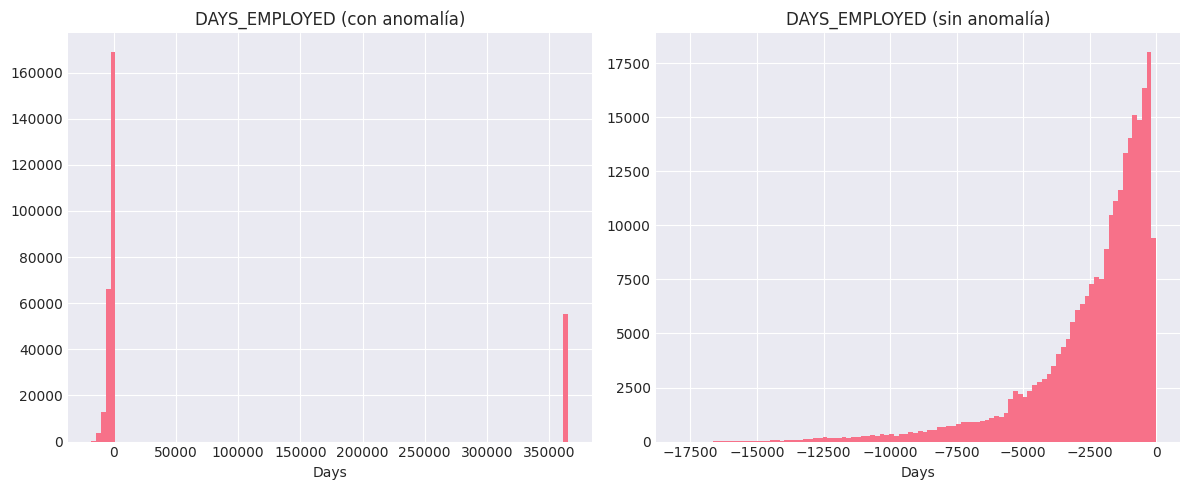

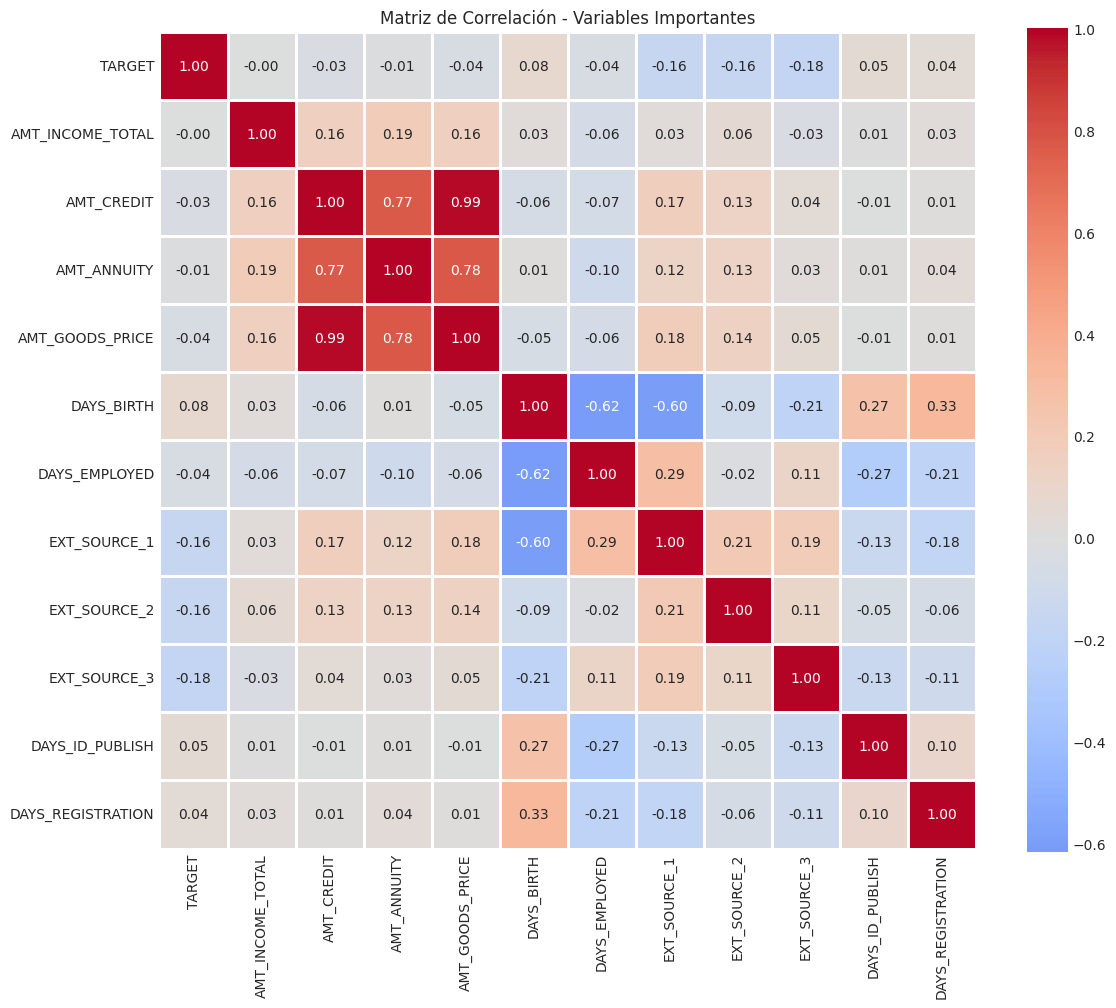

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# PARTE 1: CARGA Y OVERVIEW INICIAL
# =============================================================================

print("="*80)
print("ANÁLISIS EXPLORATORIO - HOME CREDIT DEFAULT RISK")
print("="*80)

# Cargar tabla principal
app_train = pd.read_csv('../data/raw/application_tr.csv')
app_test = pd.read_csv('../data/raw/application_ts.csv')

print(f"\n📊 DIMENSIONES")
print(f"Train: {app_train.shape}")
print(f"Test: {app_test.shape}")

# =============================================================================
# PARTE 2: ANÁLISIS DEL TARGET (CRÍTICO)
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DEL TARGET")
print("="*80)

target_counts = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100

print(f"\nDistribución del TARGET:")
print(f"  0 (Pagó bien): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Dificultades): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n⚠️  DATASET DESBALANCEADO - Ratio: {target_pct[0]/target_pct[1]:.1f}:1")

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
app_train['TARGET'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Distribución del TARGET (conteo)')
ax[0].set_xlabel('TARGET')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(['Pagó bien (0)', 'Default (1)'], rotation=0)

app_train['TARGET'].value_counts(normalize=True).plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                       ax=ax[1],
                                                       colors=['green', 'red'],
                                                       labels=['Pagó bien', 'Default'])
ax[1].set_title('Proporción del TARGET')
plt.tight_layout()


# =============================================================================
# PARTE 3: ANÁLISIS DE MISSING VALUES
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

missing = app_train.isnull().sum()
missing_pct = (missing / len(app_train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Pct': missing_pct
}).sort_values('Missing_Pct', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

print(f"\nVariables con missing: {len(missing_df)} de {app_train.shape[1]}")
print(f"\nTop 15 variables con más missing:")
print(missing_df.head(15))

# Categorizar missing
high_missing = missing_df[missing_df['Missing_Pct'] > 50]
medium_missing = missing_df[(missing_df['Missing_Pct'] > 10) & (missing_df['Missing_Pct'] <= 50)]
low_missing = missing_df[missing_df['Missing_Pct'] <= 10]

print(f"\n📌 RESUMEN MISSING:")
print(f"  >50% missing: {len(high_missing)} variables")
print(f"  10-50% missing: {len(medium_missing)} variables")
print(f"  <10% missing: {len(low_missing)} variables")

# Visualización
plt.figure(figsize=(14, 6))
top_missing = missing_df.head(30)
plt.barh(range(len(top_missing)), top_missing['Missing_Pct'])
plt.yticks(range(len(top_missing)), top_missing.index)
plt.xlabel('% Missing')
plt.title('Top 30 Variables con Valores Faltantes')
plt.axvline(x=50, color='red', linestyle='--', label='50% threshold')
plt.legend()
plt.tight_layout()


# =============================================================================
# PARTE 4: ANÁLISIS DE VARIABLES CLAVE (EXT_SOURCE)
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE EXT_SOURCE (Variables Externas - MUY PREDICTIVAS)")
print("="*80)

ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for col in ext_sources:
    print(f"\n{col}:")
    print(f"  Missing: {app_train[col].isnull().sum()} ({app_train[col].isnull().sum()/len(app_train)*100:.1f}%)")
    print(f"  Range: [{app_train[col].min():.4f}, {app_train[col].max():.4f}]")
    print(f"  Mean: {app_train[col].mean():.4f}")

    # Correlación con TARGET
    corr = app_train[[col, 'TARGET']].corr().iloc[0, 1]
    print(f"  Correlación con TARGET: {corr:.4f}")

# Visualización de EXT_SOURCE vs TARGET
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for idx, col in enumerate(ext_sources):
    # Distribución por TARGET
    ax = axes[0, idx]
    app_train[app_train['TARGET']==0][col].hist(bins=50, alpha=0.5, label='No Default', ax=ax, color='green')
    app_train[app_train['TARGET']==1][col].hist(bins=50, alpha=0.5, label='Default', ax=ax, color='red')
    ax.set_title(f'{col} por TARGET')
    ax.legend()
    ax.set_xlabel(col)

    # Boxplot
    ax = axes[1, idx]
    app_train.boxplot(column=col, by='TARGET', ax=ax)
    ax.set_title(f'{col} Boxplot por TARGET')
    ax.set_xlabel('TARGET')

plt.tight_layout()


# =============================================================================
# PARTE 5: VARIABLES CATEGÓRICAS CLAVE
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

categorical_vars = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
                   'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    if var in app_train.columns:
        # Target rate por categoría
        target_rate = app_train.groupby(var)['TARGET'].agg(['mean', 'count', 'sum'])
        target_rate = target_rate.sort_values('mean', ascending=False)

        print(f"\n{var}:")
        print(f"  Categorías únicas: {app_train[var].nunique()}")
        print(f"  Missing: {app_train[var].isnull().sum()}")
        print(f"\n  Target Rate por categoría:")
        print(target_rate)

        # Gráfico
        ax = axes[idx]
        target_rate['mean'].plot(kind='barh', ax=ax, color='coral')
        ax.set_title(f'Default Rate por {var}')
        ax.set_xlabel('Default Rate')
        ax.axvline(x=app_train['TARGET'].mean(), color='red', linestyle='--',
                  label=f'Media general: {app_train["TARGET"].mean():.3f}')
        ax.legend()

plt.tight_layout()


# =============================================================================
# PARTE 6: VARIABLES NUMÉRICAS CLAVE
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES NUMÉRICAS CLAVE")
print("="*80)

numerical_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED']

# Estadísticas descriptivas por TARGET
print("\nEstadísticas por TARGET:")
for var in numerical_vars:
    print(f"\n{var}:")
    stats_by_target = app_train.groupby('TARGET')[var].describe()
    print(stats_by_target)

    # Test de diferencia de medias
    group_0 = app_train[app_train['TARGET']==0][var].dropna()
    group_1 = app_train[app_train['TARGET']==1][var].dropna()
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    print(f"  T-test p-value: {p_value:.6f} {'***' if p_value < 0.001 else ''}")

# Visualización
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]
    app_train.boxplot(column=var, by='TARGET', ax=ax)
    ax.set_title(f'{var} por TARGET')
    ax.set_xlabel('TARGET')
    plt.sca(ax)
    plt.xticks([1, 2], ['No Default', 'Default'])

plt.tight_layout()


# =============================================================================
# PARTE 7: DETECCIÓN DE ANOMALÍAS EN DAYS_EMPLOYED
# =============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESPECIAL: DAYS_EMPLOYED (Anomalía conocida)")
print("="*80)

# Detectar el valor anómalo (365243 = desempleados codificados)
anomaly_value = 365243
anomaly_count = (app_train['DAYS_EMPLOYED'] == anomaly_value).sum()
anomaly_pct = anomaly_count / len(app_train) * 100

print(f"\n⚠️  Valor anómalo {anomaly_value} encontrado:")
print(f"  Frecuencia: {anomaly_count:,} ({anomaly_pct:.2f}%)")
print(f"  Interpretación: Probablemente representa desempleados o pensionados")

# Distribución sin anomalía
days_employed_clean = app_train[app_train['DAYS_EMPLOYED'] != anomaly_value]['DAYS_EMPLOYED']
print(f"\nEstadísticas sin anomalía:")
print(days_employed_clean.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
app_train['DAYS_EMPLOYED'].hist(bins=100)
plt.title('DAYS_EMPLOYED (con anomalía)')
plt.xlabel('Days')

plt.subplot(1, 2, 2)
days_employed_clean.hist(bins=100)
plt.title('DAYS_EMPLOYED (sin anomalía)')
plt.xlabel('Days')
plt.tight_layout()


# =============================================================================
# PARTE 8: MATRIZ DE CORRELACIÓN
# =============================================================================

print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN CON TARGET")
print("="*80)

# Seleccionar variables numéricas importantes
important_vars = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

correlation_data = app_train[important_vars].corr()
target_corr = correlation_data['TARGET'].sort_values(ascending=False)

print("\nTop correlaciones con TARGET:")
print(target_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables Importantes')
plt.tight_layout()


# =============================================================================
# PARTE 9: RESUMEN Y RECOMENDACIONES
# =============================================================================

print("\n" + "="*80)
print("RESUMEN Y SIGUIENTES PASOS")
print("="*80)

print("\n🎯 HALLAZGOS PRINCIPALES:")
print(f"  1. Dataset desbalanceado: {target_pct[1]:.1f}% de defaults")
print(f"  2. EXT_SOURCE_2 tiene mejor cobertura y correlación con TARGET")
print(f"  3. DAYS_EMPLOYED tiene anomalía (365243) que debe tratarse")
print(f"  4. {len(high_missing)} variables con >50% missing (considerar eliminar)")
print(f"  5. Variables categóricas muestran diferentes default rates")

print("\n📋 RECOMENDACIONES PARA FEATURE ENGINEERING:")
print("  1. Crear flag para DAYS_EMPLOYED anómalo")
print("  2. Convertir DAYS_* a años (más interpretable)")
print("  3. Crear ratios: AMT_CREDIT/AMT_INCOME, AMT_ANNUITY/AMT_INCOME")
print("  4. Imputar EXT_SOURCE con modelos o estrategia específica")
print("  5. Agregar datos de tablas secundarias (bureau, previous_application)")
print("  6. Encoding de variables categóricas")

In [8]:
print(app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].count())

EXT_SOURCE_1    134133
EXT_SOURCE_2    306851
EXT_SOURCE_3    246546
dtype: int64


In [9]:
ext_sources = app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]
print(ext_sources.corr())


              EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_1      1.000000      0.213982      0.186846
EXT_SOURCE_2      0.213982      1.000000      0.109167
EXT_SOURCE_3      0.186846      0.109167      1.000000


In [10]:
keywords = ["AVG", "MEDI", "MODE"]
cols_to_drop = [col for col in app_train.columns if any(k in col for k in keywords)]

# Agregar las columnas específicas

# Eliminar columnas
app_train_clean = app_train.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Dimensiones originales:", app_train.shape)
print("Dimensiones después de limpiar:", app_train_clean.shape)

Columnas eliminadas: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Dimensi

In [11]:
nulls = app_train_clean.isnull().sum().sort_values(ascending=False)
print(nulls.head(20))

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
NAME_TYPE_SUITE                 1292
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
dtype: int64


In [12]:
nulls_pct = (app_train_clean.isnull().mean() * 100).sort_values(ascending=False)
print(nulls_pct.head(20))

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


/tmp/ipykernel_965/2604539953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulls_pct.index[:20], y=nulls_pct.values[:20], palette="viridis")


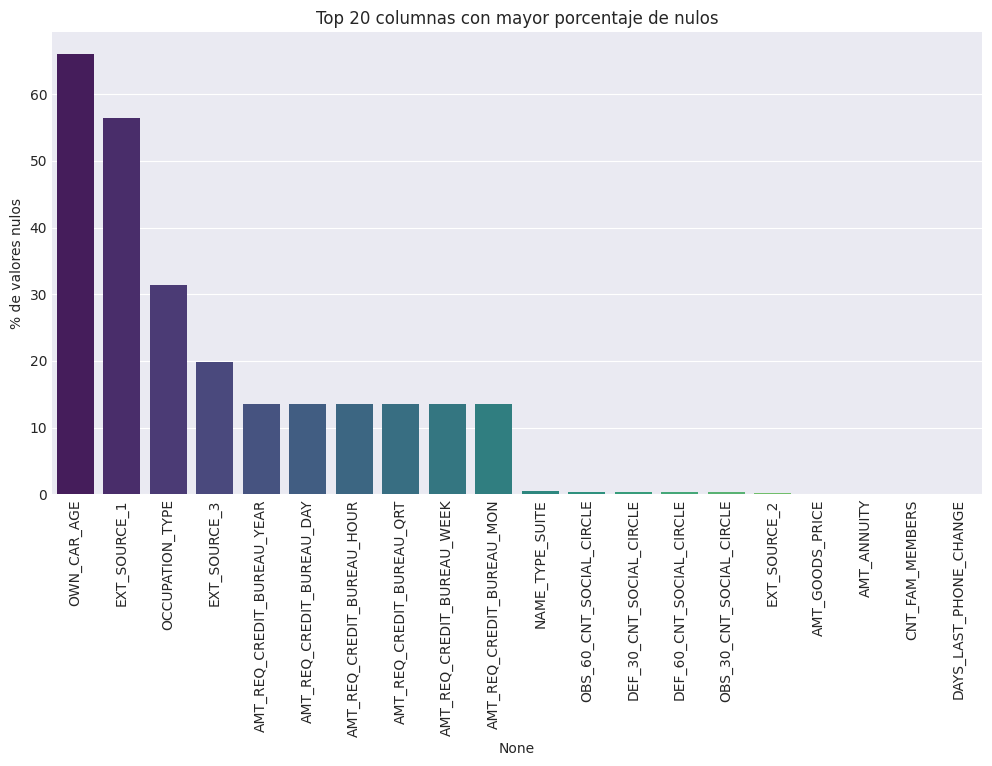

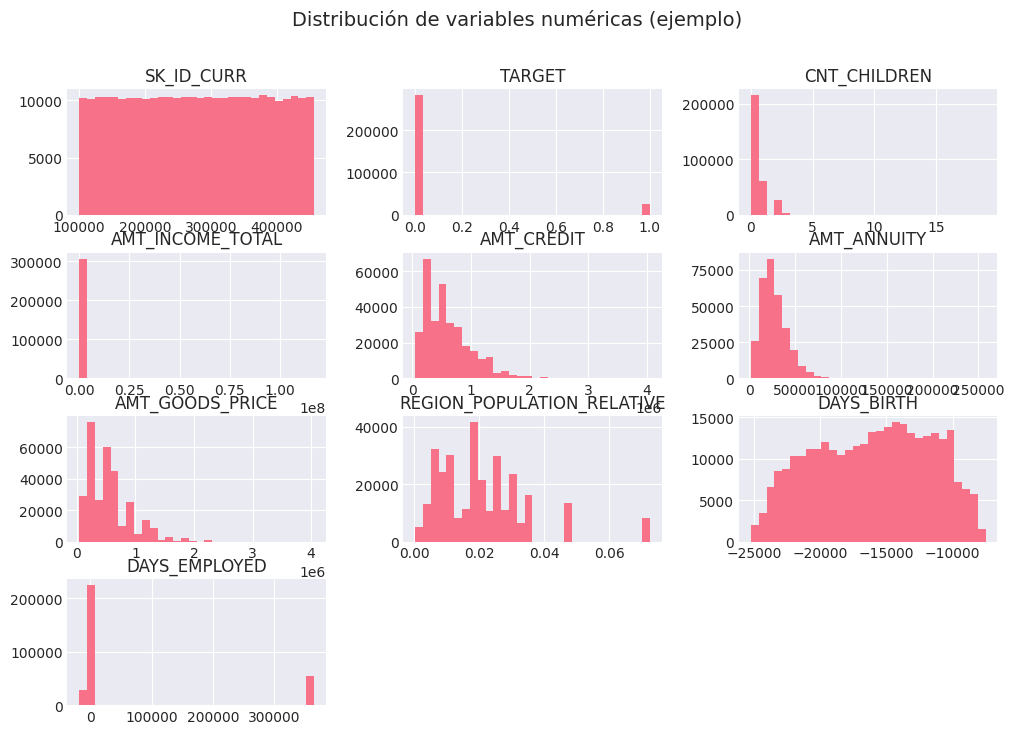

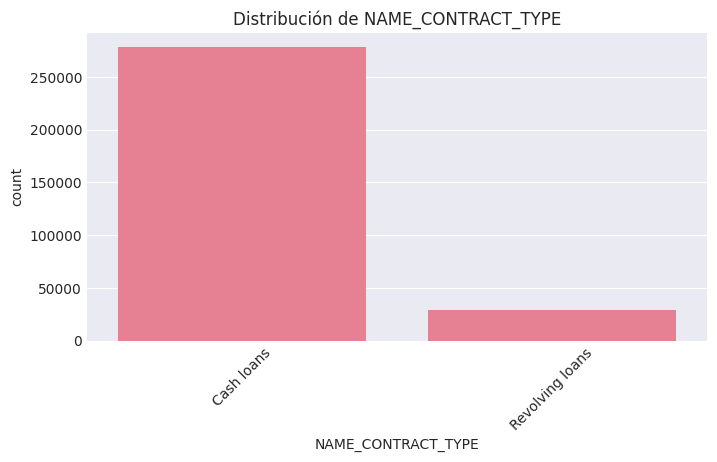

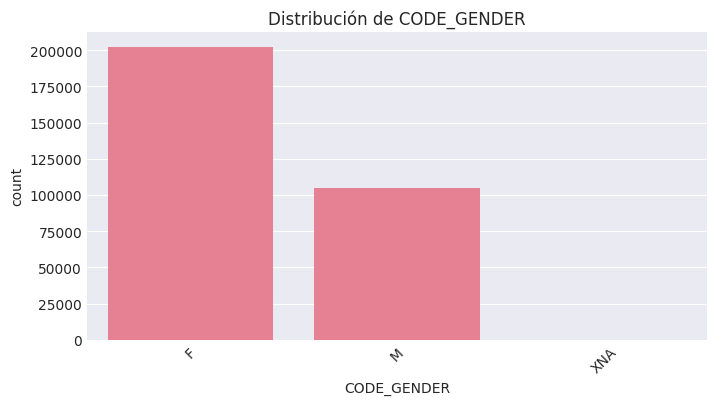

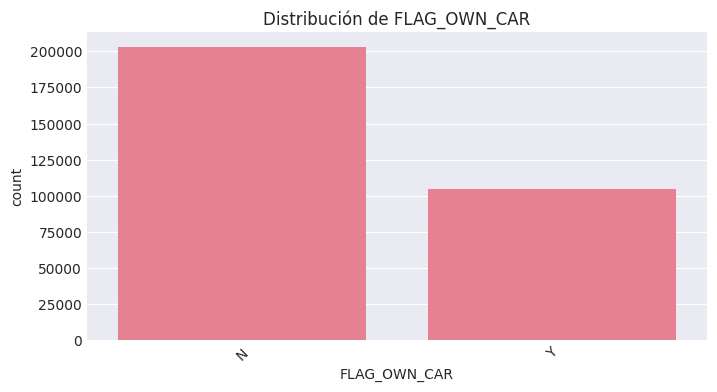

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=nulls_pct.index[:20], y=nulls_pct.values[:20], palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 columnas con mayor porcentaje de nulos")
plt.ylabel("% de valores nulos")
plt.show()
# Distribución de algunas variables numéricas
num_cols = app_train_clean.select_dtypes(include=["float64","int64"]).columns[:10]  # primeras 5 numéricas
app_train_clean[num_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribución de variables numéricas (ejemplo)", fontsize=14)
plt.show()

# Distribución de variables categóricas
cat_cols = app_train_clean.select_dtypes(include=["object"]).columns[:3]  # primeras 3 categóricas
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=app_train_clean, order=app_train_clean[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col}")
    plt.show()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


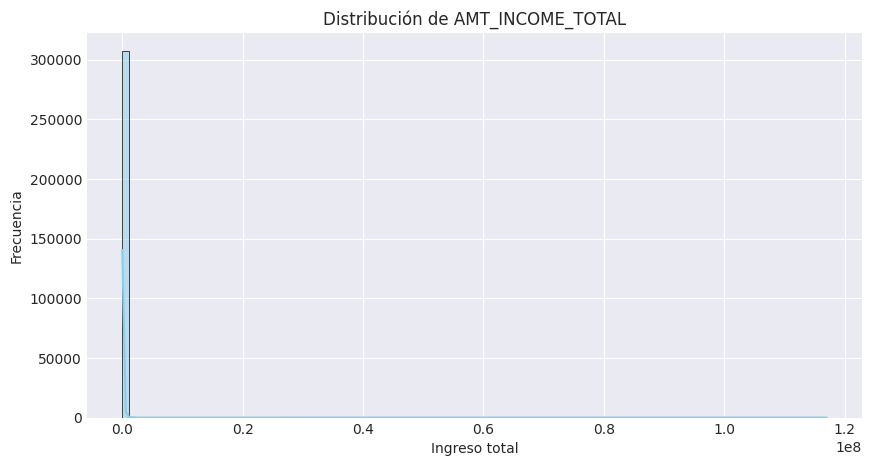

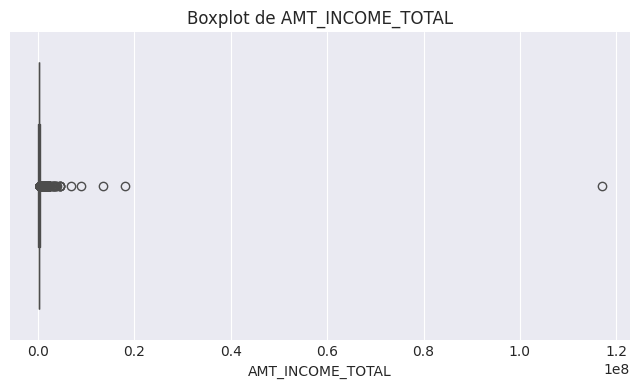

/tmp/ipykernel_965/1761664080.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app_train_clean, palette=["green","red"])


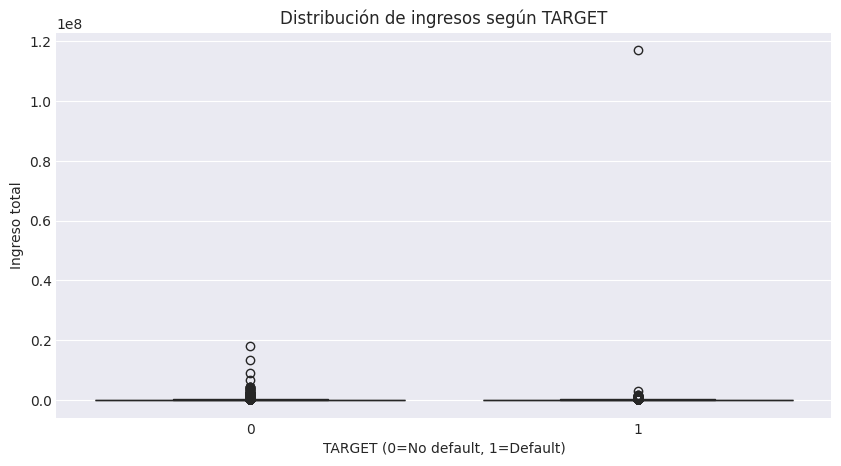

Valores únicos: 2548
Top 10 ingresos más frecuentes:
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: count, dtype: int64


In [14]:
# 1. Información básica
print(app_train_clean["AMT_INCOME_TOTAL"].describe())

# 2. Distribución general
plt.figure(figsize=(10,5))
sns.histplot(app_train_clean["AMT_INCOME_TOTAL"], bins=100, kde=True, color="skyblue")
plt.title("Distribución de AMT_INCOME_TOTAL")
plt.xlabel("Ingreso total")
plt.ylabel("Frecuencia")
plt.show()

# 3. Boxplot para detectar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=app_train_clean["AMT_INCOME_TOTAL"], color="orange")
plt.title("Boxplot de AMT_INCOME_TOTAL")
plt.show()

# 4. Relación con TARGET
plt.figure(figsize=(10,5))
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app_train_clean, palette=["green","red"])
plt.title("Distribución de ingresos según TARGET")
plt.xlabel("TARGET (0=No default, 1=Default)")
plt.ylabel("Ingreso total")
plt.show()

# 5. Valores únicos y top categorías
print("Valores únicos:", app_train_clean["AMT_INCOME_TOTAL"].nunique())
print("Top 10 ingresos más frecuentes:")
print(app_train_clean["AMT_INCOME_TOTAL"].value_counts().head(10))

In [15]:
df = app_train_clean

In [16]:
def analizar_columnas(df, columnas_numericas=None, columnas_categoricas=None):
    # --- Columnas numéricas ---
    if columnas_numericas:
        print("\n📊 Análisis de columnas numéricas:")
        for col in columnas_numericas:
            if col in df.columns:
                print(f"\n--- {col} ---")
                print(df[col].describe())  # incluye count, mean, std, min, percentiles, max
                print(f"Mediana: {df[col].median()}")
                print(f"Valores nulos: {df[col].isnull().sum()}")
            else:
                print(f"⚠️ La columna '{col}' no existe en el DataFrame.")



In [17]:
pd.set_option('display.float_format', lambda x: f'{x:.6f}')

In [18]:
cols_num = ["AMT_REQ_CREDIT_BUREAU_YEAR", "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1","AMT_CREDIT", "CNT_CHILDREN", "DAYS_EMPLOYED"] 
analizar_columnas(df, columnas_numericas=cols_num)


📊 Análisis de columnas numéricas:

--- AMT_REQ_CREDIT_BUREAU_YEAR ---
count   265992.000000
mean         1.899974
std          1.869295
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
Mediana: 1.0
Valores nulos: 41519

--- EXT_SOURCE_3 ---
count   246546.000000
mean         0.510853
std          0.194844
min          0.000527
25%          0.370650
50%          0.535276
75%          0.669057
max          0.896010
Name: EXT_SOURCE_3, dtype: float64
Mediana: 0.5352762504724826
Valores nulos: 60965

--- EXT_SOURCE_2 ---
count   306851.000000
mean         0.514393
std          0.191060
min          0.000000
25%          0.392457
50%          0.565961
75%          0.663617
max          0.855000
Name: EXT_SOURCE_2, dtype: float64
Mediana: 0.5659614260608526
Valores nulos: 660

--- EXT_SOURCE_1 ---
count   134133.000000
mean         0.502130
std          0.211062
min          0.01456

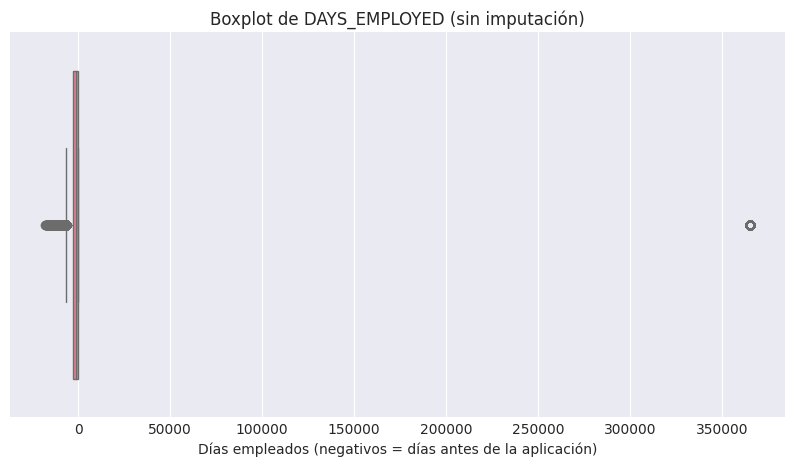

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["DAYS_EMPLOYED"])
plt.title("Boxplot de DAYS_EMPLOYED (sin imputación)")
plt.xlabel("Días empleados (negativos = días antes de la aplicación)")
plt.show()


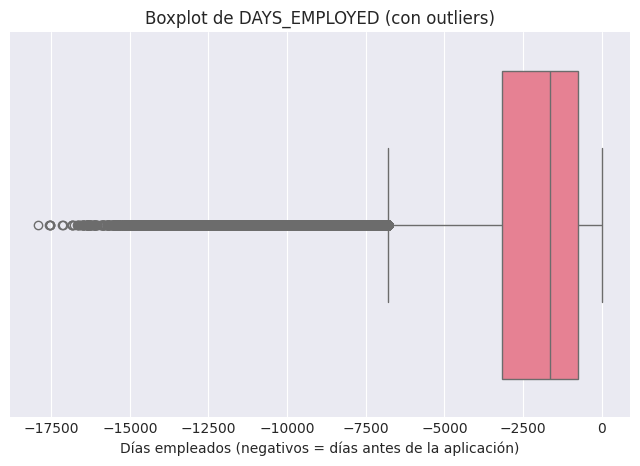

In [20]:
# Copia del dataframe para no modificar el original
df_temp = df.copy()

# Reemplazar el valor especial 365243 por NaN (dato faltante)
df_temp["DAYS_EMPLOYED"] = df_temp["DAYS_EMPLOYED"].replace(365243, pd.NA)

# Crear boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df_temp["DAYS_EMPLOYED"])
plt.title("Boxplot de DAYS_EMPLOYED (con outliers)")
plt.xlabel("Días empleados (negativos = días antes de la aplicación)")
plt.show()


In [21]:
df = df_temp.copy()


In [22]:
df.to_csv('../data/processed/aplicationtrainlimpio1.csv', index=False)


Eliminado Outlier unico de DAYS_EMPLOYED

In [23]:

def analizar_flags_vs_target(df, target_col="TARGET", flag_prefix="FLAG_"):
    # Filtrar las columnas que empiezan con FLAG_DOCUMENT_
    flag_cols = [col for col in df.columns if col.startswith(flag_prefix)]
    
    resultados = {}
    for col in flag_cols:
        # Agrupar por el flag y calcular la tasa de default (TARGET=1)
        tabla = df.groupby(col)[target_col].agg(
            tasa_default="mean",  # proporción de defaults
            cantidad="count"      # número de registros
        )
        resultados[col] = tabla
    
    # Mostrar resultados
    for col, tabla in resultados.items():
        print(f"\n--- {col} ---")
        print(tabla)

# Ejemplo de uso
analizar_flags_vs_target(df)



--- FLAG_OWN_CAR ---
              tasa_default  cantidad
FLAG_OWN_CAR                        
N                 0.085002    202924
Y                 0.072437    104587

--- FLAG_OWN_REALTY ---
                 tasa_default  cantidad
FLAG_OWN_REALTY                        
N                    0.083249     94199
Y                    0.079616    213312

--- FLAG_MOBIL ---
            tasa_default  cantidad
FLAG_MOBIL                        
0               0.000000         1
1               0.080729    307510

--- FLAG_EMP_PHONE ---
                tasa_default  cantidad
FLAG_EMP_PHONE                        
0                   0.054003     55386
1                   0.086600    252125

--- FLAG_WORK_PHONE ---
                 tasa_default  cantidad
FLAG_WORK_PHONE                        
0                    0.076851    246203
1                    0.096301     61308

--- FLAG_CONT_MOBILE ---
                  tasa_default  cantidad
FLAG_CONT_MOBILE                        
0           

Se podrian imputar la gran mayoria de los Flags ya que no muestran relacion con la taza de default

In [24]:
def analizar_categoricas_vs_target(df, columnas_categoricas, target_col="TARGET"):
    resultados = {}
    for col in columnas_categoricas:
        if col in df.columns:
            # Agrupar por cada categoría y calcular tasa de default
            tabla = df.groupby(col)[target_col].agg(
                tasa_default="mean",   # proporción de defaults
                cantidad="count"       # número de registros
            )
            resultados[col] = tabla
        else:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
    
    # Mostrar resultados
    for col, tabla in resultados.items():
        print(f"\n--- {col} ---")
        print(tabla)

# Ejemplo de uso:
cols_cat = ["CODE_GENDER",'OCCUPATION_TYPE', "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE"]
analizar_categoricas_vs_target(df, columnas_categoricas=cols_cat)



--- CODE_GENDER ---
             tasa_default  cantidad
CODE_GENDER                        
F                0.069993    202448
M                0.101419    105059
XNA              0.000000         4

--- OCCUPATION_TYPE ---
                       tasa_default  cantidad
OCCUPATION_TYPE                              
Accountants                0.048303      9813
Cleaning staff             0.096067      4653
Cooking staff              0.104440      5946
Core staff                 0.063040     27570
Drivers                    0.113261     18603
HR staff                   0.063943       563
High skill tech staff      0.061599     11380
IT staff                   0.064639       526
Laborers                   0.105788     55186
Low-skill Laborers         0.171524      2093
Managers                   0.062140     21371
Medicine staff             0.067002      8537
Private service staff      0.065988      2652
Realty agents              0.078562       751
Sales staff                0.096318   

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


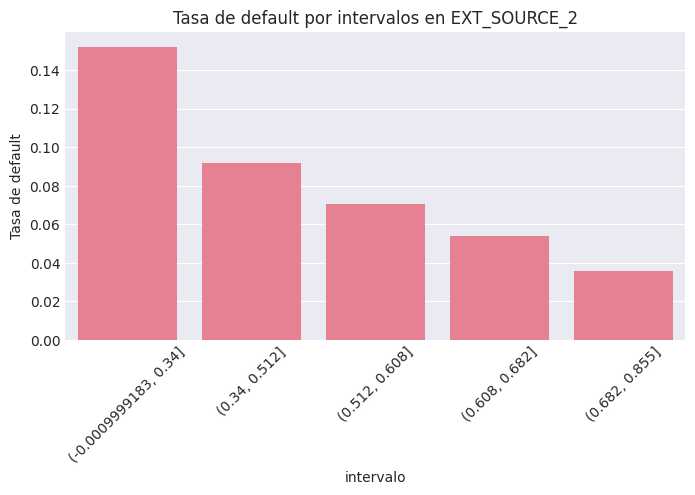

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


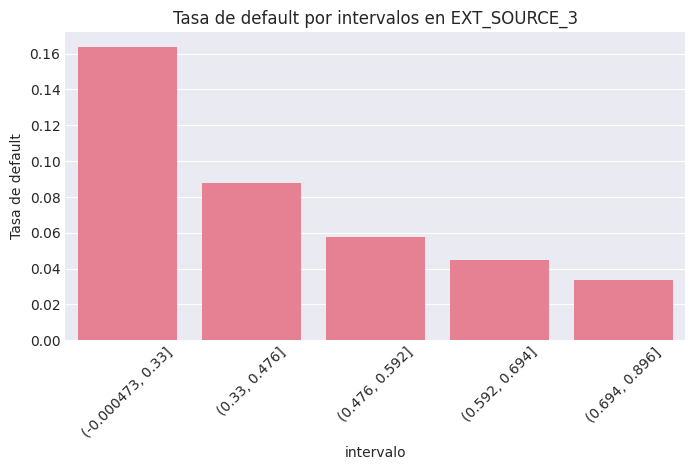

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


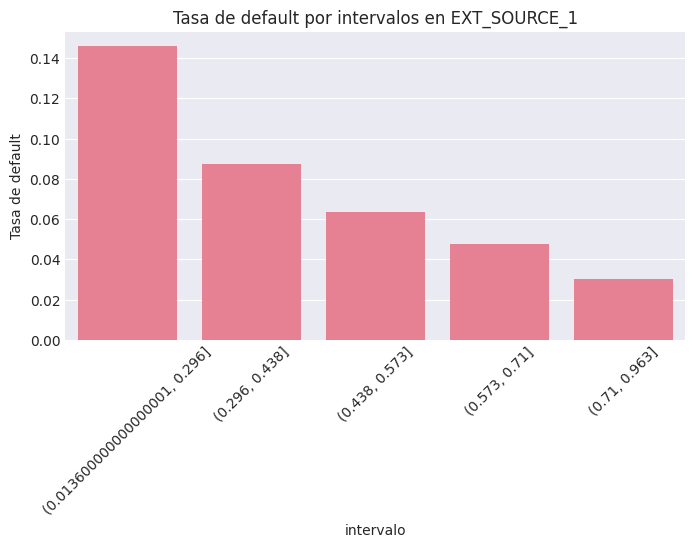

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


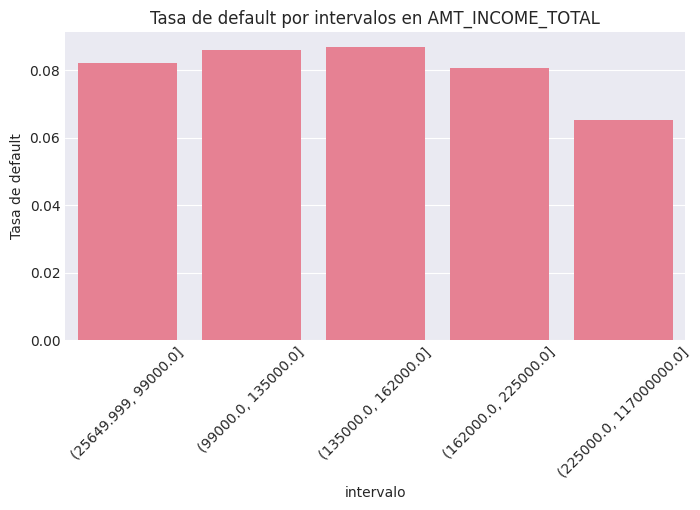

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


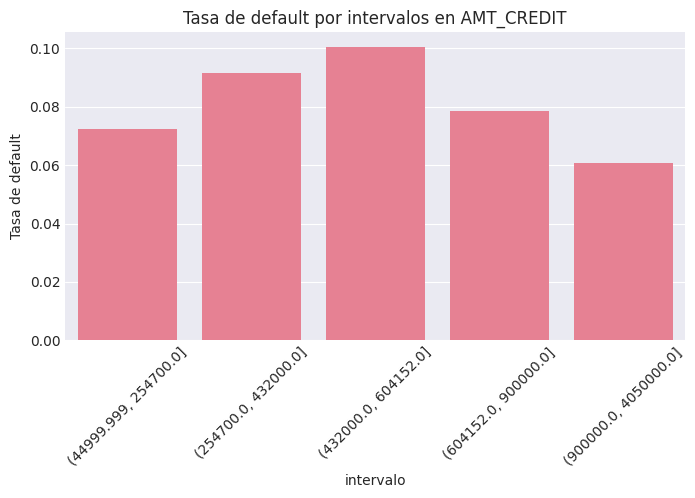

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


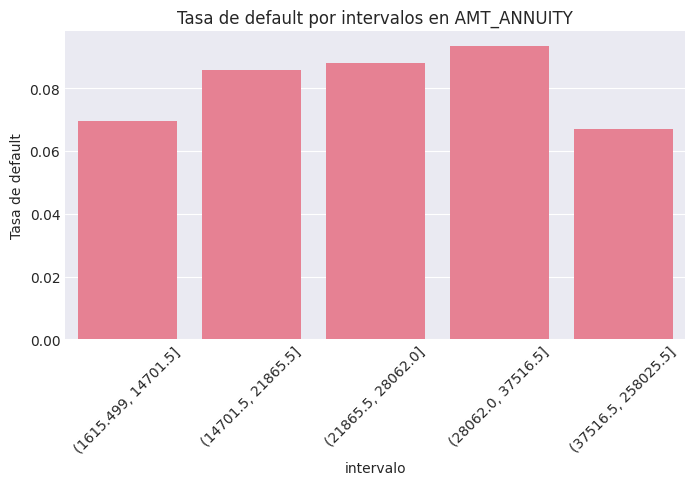

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


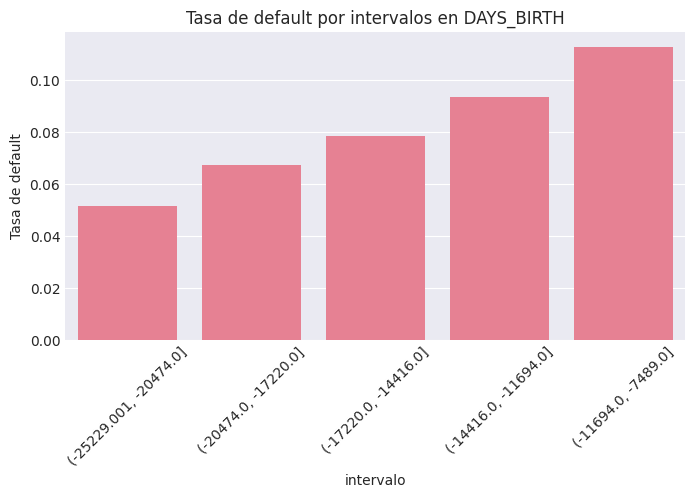

/tmp/ipykernel_965/2930545702.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


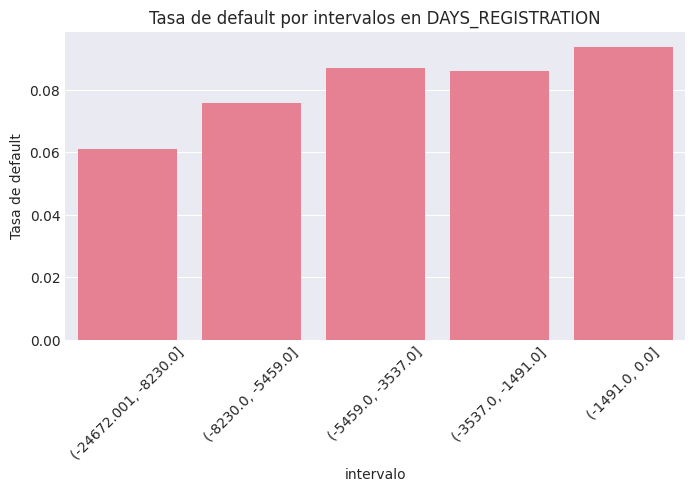

In [25]:
def graficar_numericas_vs_target(df, columnas_numericas, target_col="TARGET", bins=5):
    for col in columnas_numericas:
        if col in df.columns:
            # Dividir en intervalos
            df_temp = df[[col, target_col]].copy()
            df_temp["intervalo"] = pd.qcut(df_temp[col], q=bins, duplicates="drop")
            
            tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()
            
            plt.figure(figsize=(8,4))
            sns.barplot(data=tabla, x="intervalo", y=target_col)
            plt.title(f"Tasa de default por intervalos en {col}")
            plt.ylabel("Tasa de default")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")

# Ejemplo de uso:
cols_num = ["EXT_SOURCE_2", "EXT_SOURCE_3","EXT_SOURCE_1", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "DAYS_BIRTH", "DAYS_REGISTRATION"]
graficar_numericas_vs_target(df, columnas_numericas=cols_num, bins=5)


Se ve claramente como aumenta el default con menor puntaje crediticio

In [26]:
for col in ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
            "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]:
    print(f"\n{col} - valores únicos:")
    print(df[col].value_counts().head(10))



AMT_REQ_CREDIT_BUREAU_HOUR - valores únicos:
AMT_REQ_CREDIT_BUREAU_HOUR
0.000000    264366
1.000000      1560
2.000000        56
3.000000         9
4.000000         1
Name: count, dtype: int64

AMT_REQ_CREDIT_BUREAU_DAY - valores únicos:
AMT_REQ_CREDIT_BUREAU_DAY
0.000000    264503
1.000000      1292
2.000000       106
3.000000        45
4.000000        26
5.000000         9
6.000000         8
9.000000         2
8.000000         1
Name: count, dtype: int64

AMT_REQ_CREDIT_BUREAU_WEEK - valores únicos:
AMT_REQ_CREDIT_BUREAU_WEEK
0.000000    257456
1.000000      8208
2.000000       199
3.000000        58
4.000000        34
6.000000        20
5.000000        10
8.000000         5
7.000000         2
Name: count, dtype: int64

AMT_REQ_CREDIT_BUREAU_MON - valores únicos:
AMT_REQ_CREDIT_BUREAU_MON
0.000000    222233
1.000000     33147
2.000000      5386
3.000000      1991
4.000000      1076
5.000000       602
6.000000       343
7.000000       298
9.000000       206
8.000000       185
Name: c

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


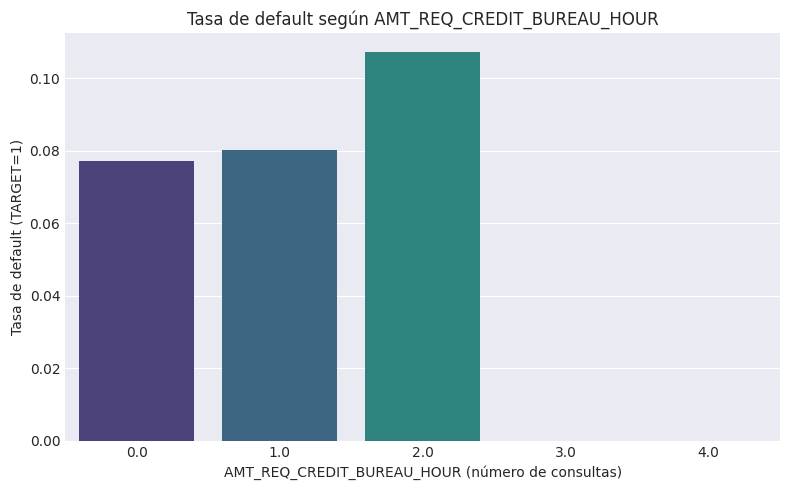

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


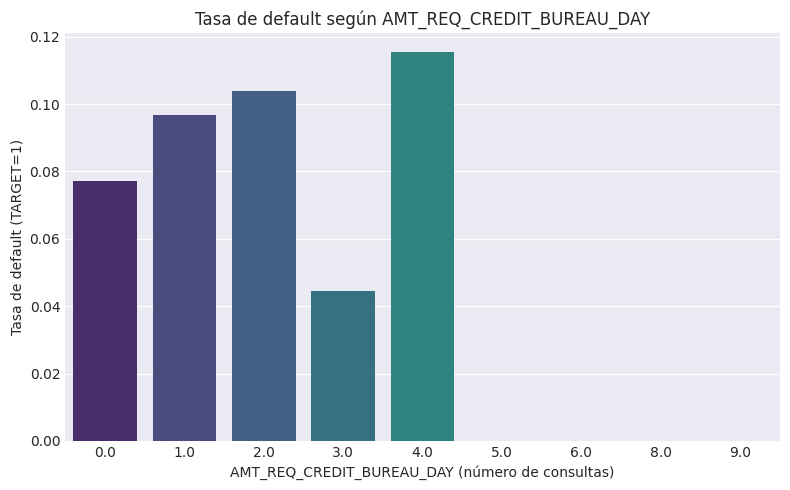

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


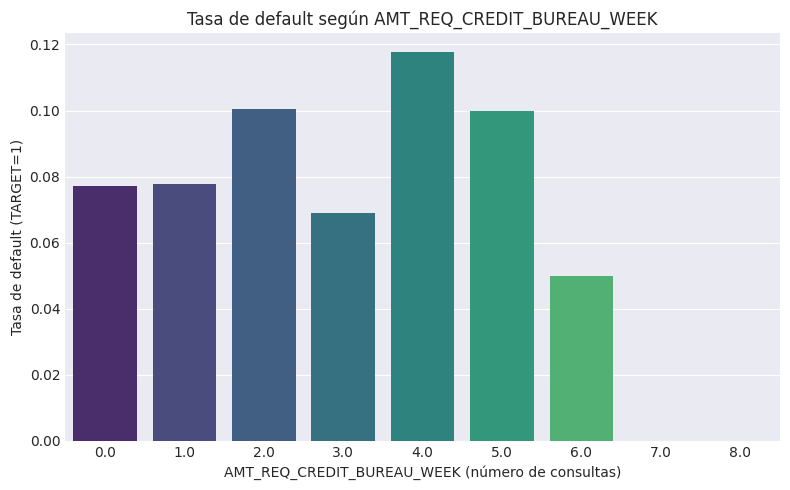

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


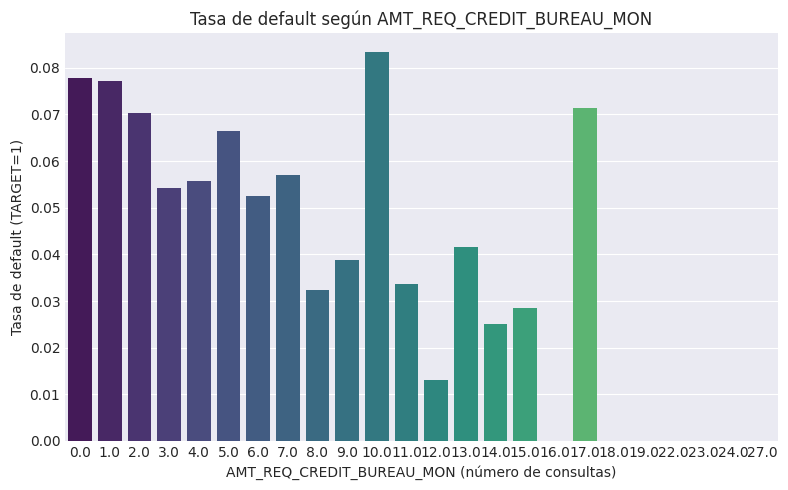

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


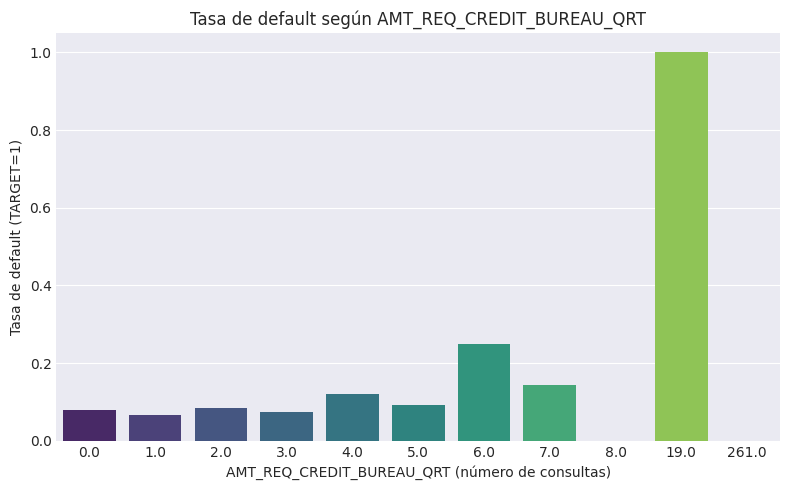

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


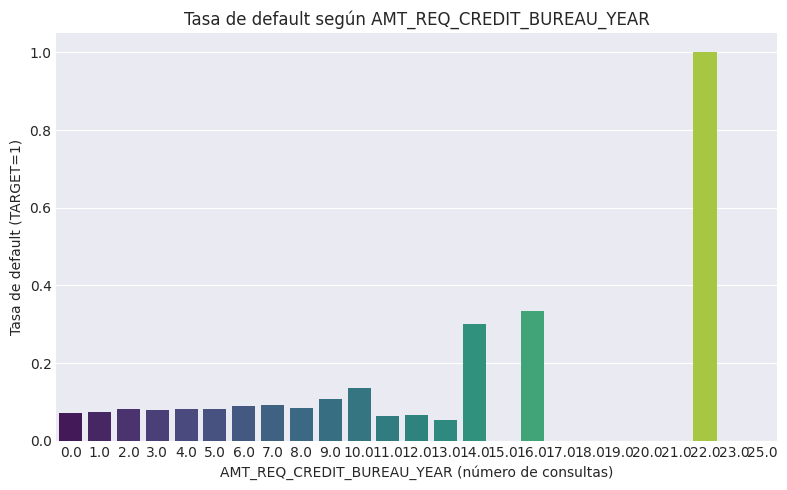

In [27]:
def graficar_bureau_vs_target(df, columnas, target_col="TARGET"):
    for col in columnas:
        if col in df.columns:
            # Agrupar por valor entero y calcular tasa de default
            tabla = df.groupby(col)[target_col].agg(
                tasa_default="mean",
                cantidad="count"
            ).reset_index()

            # Graficar
            plt.figure(figsize=(8, 5))
            sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")
            plt.title(f"Tasa de default según {col}")
            plt.ylabel("Tasa de default (TARGET=1)")
            plt.xlabel(f"{col} (número de consultas)")
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")

# Lista de columnas que quieres analizar
cols_bureau = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]

# Ejecutar la función
graficar_bureau_vs_target(df, columnas=cols_bureau)


Se pueden conservar todas al inicio y luego ir borrando de menor estacionalidad a mayor

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


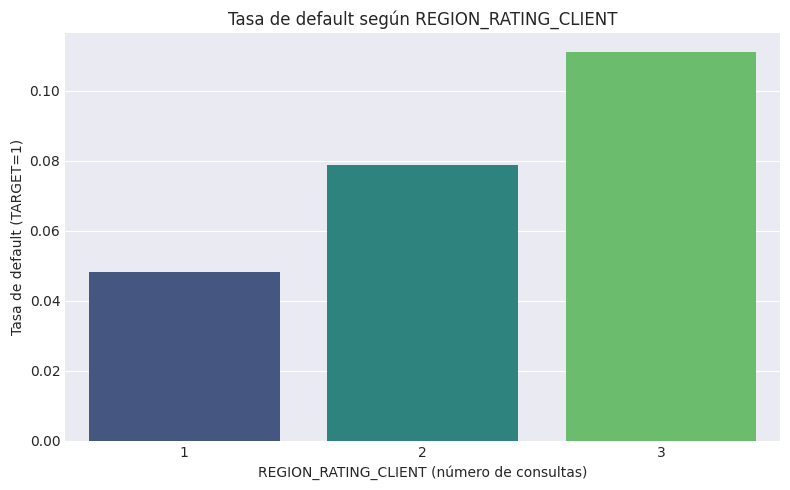

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


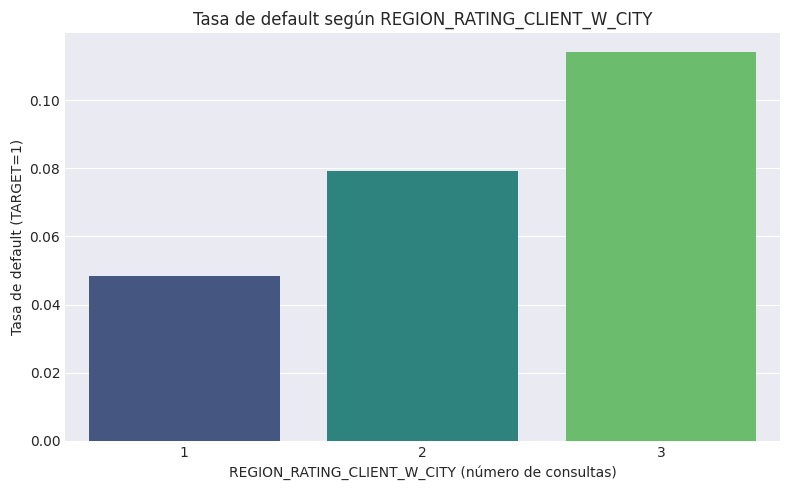

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


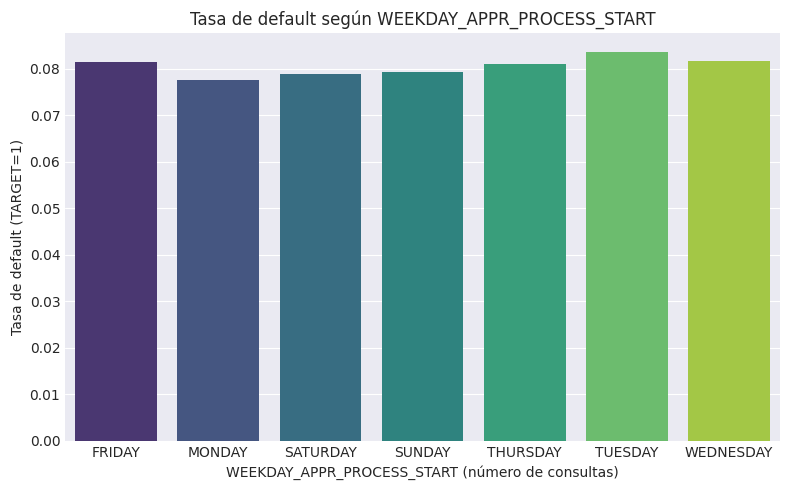

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


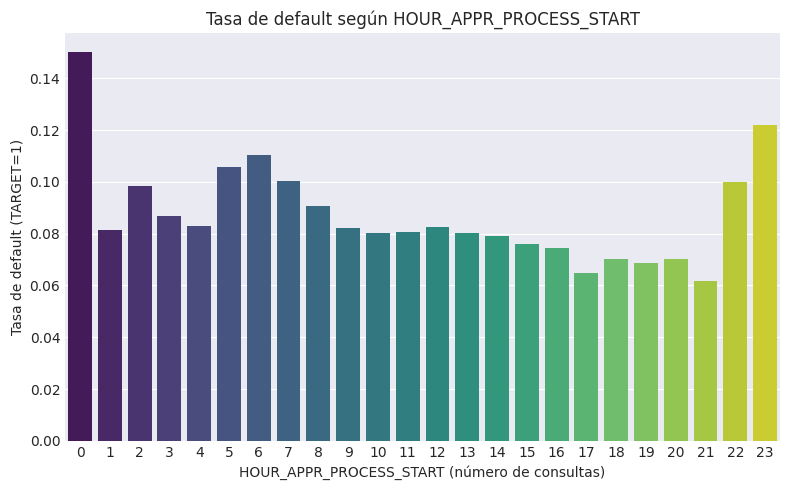

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


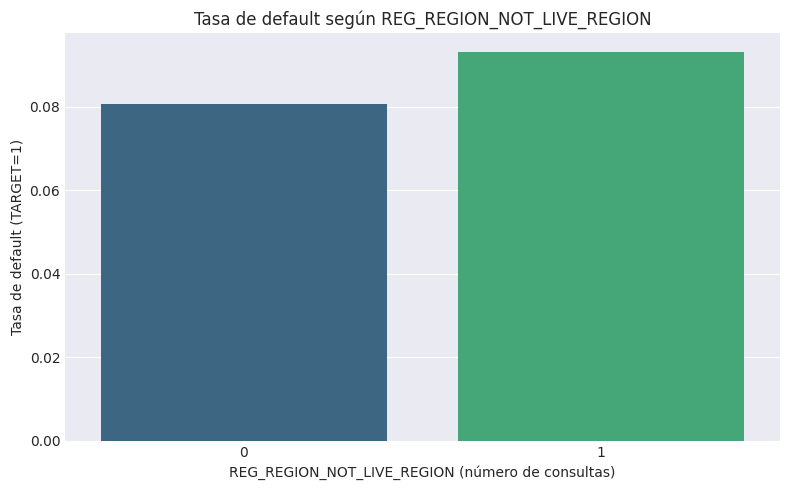

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


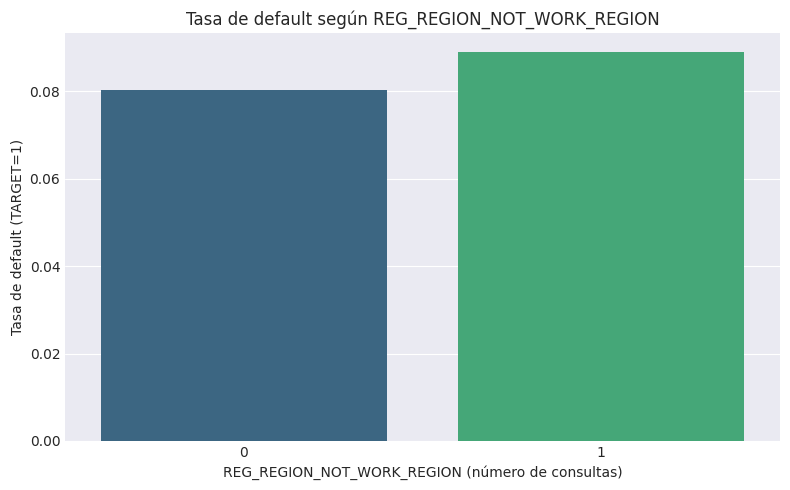

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


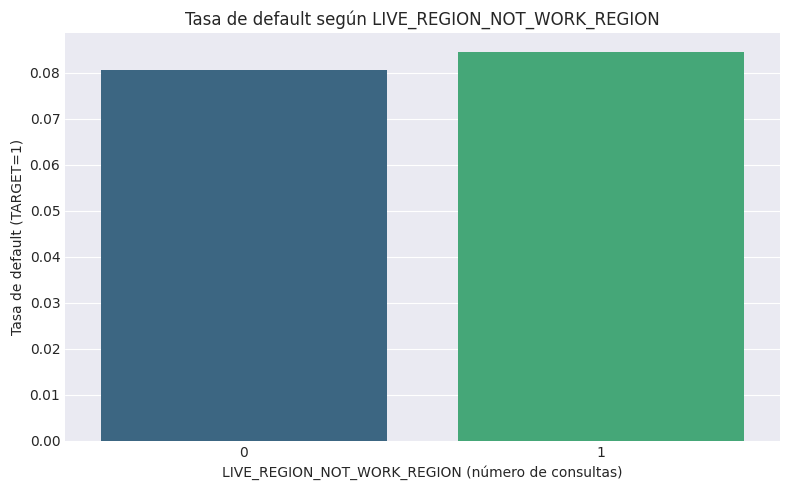

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


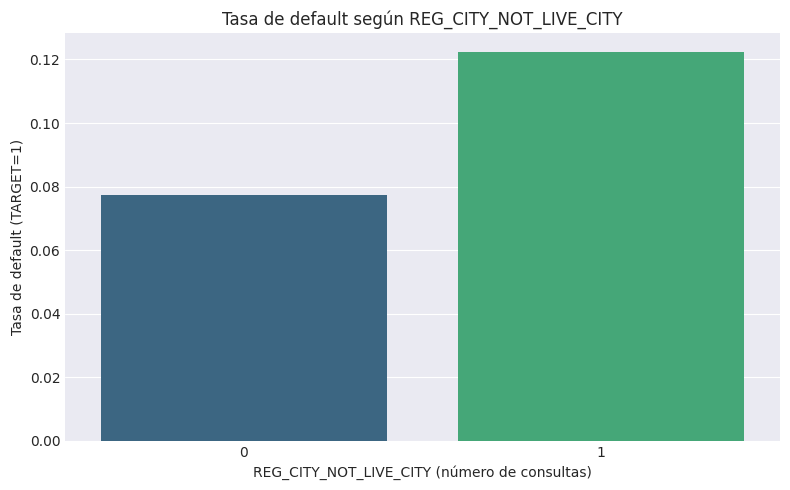

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


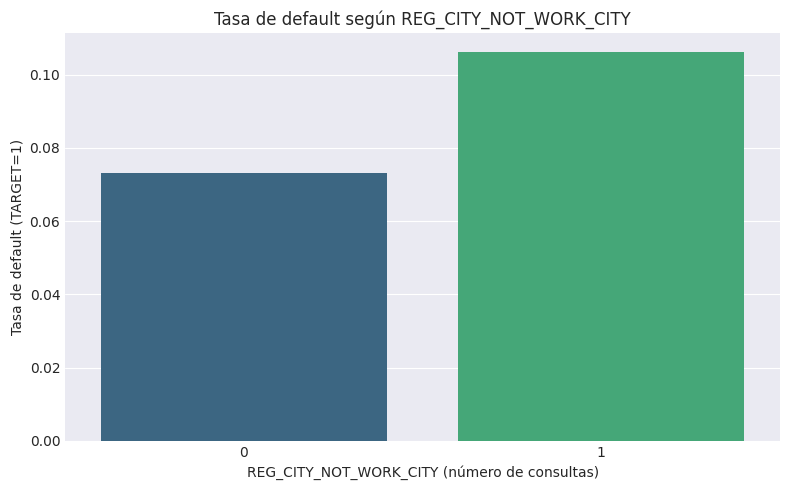

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


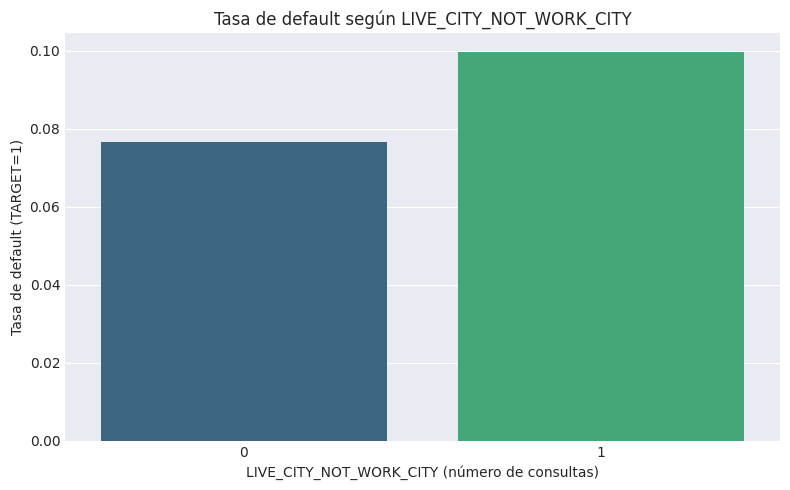

In [28]:
cols = [
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "WEEKDAY_APPR_PROCESS_START",
    "HOUR_APPR_PROCESS_START",
    "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION",
    "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY",
    "REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY"
]

graficar_bureau_vs_target(df, columnas=cols)

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


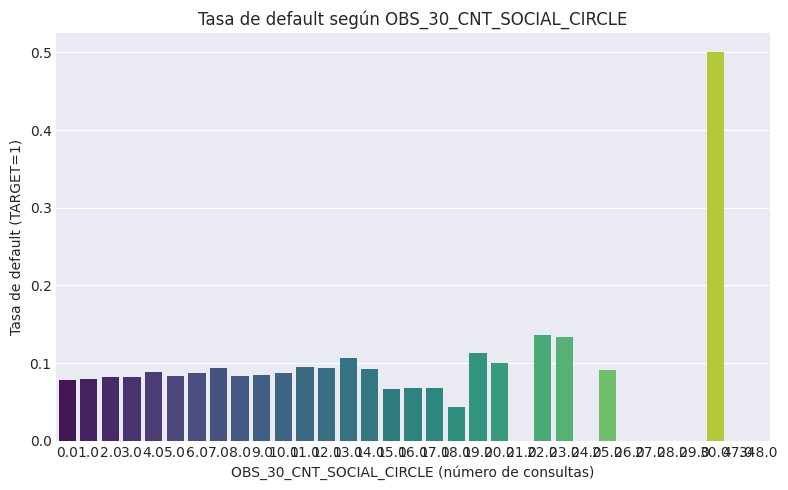

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


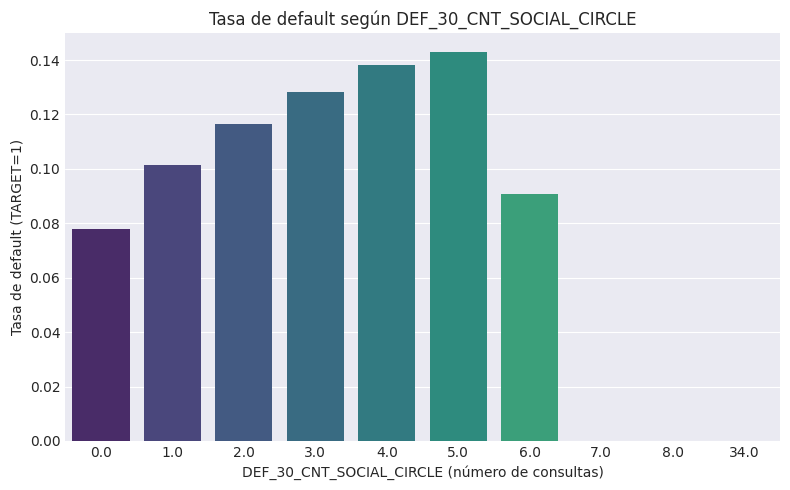

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


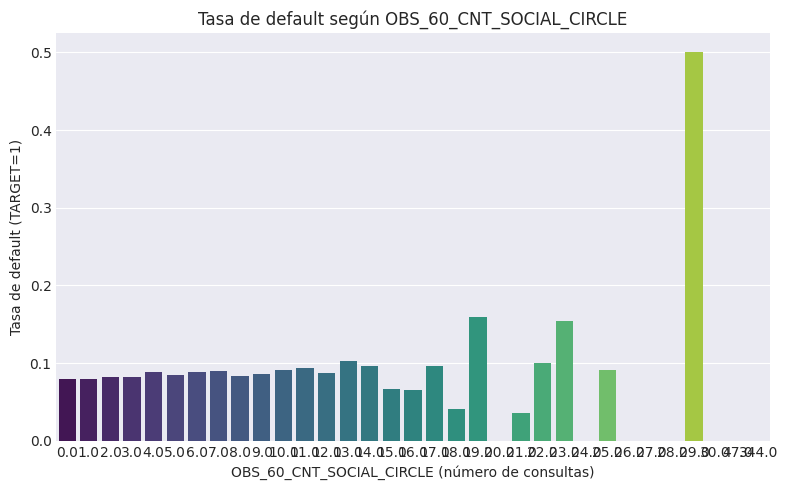

/tmp/ipykernel_965/827618985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla, x=col, y="tasa_default", palette="viridis")


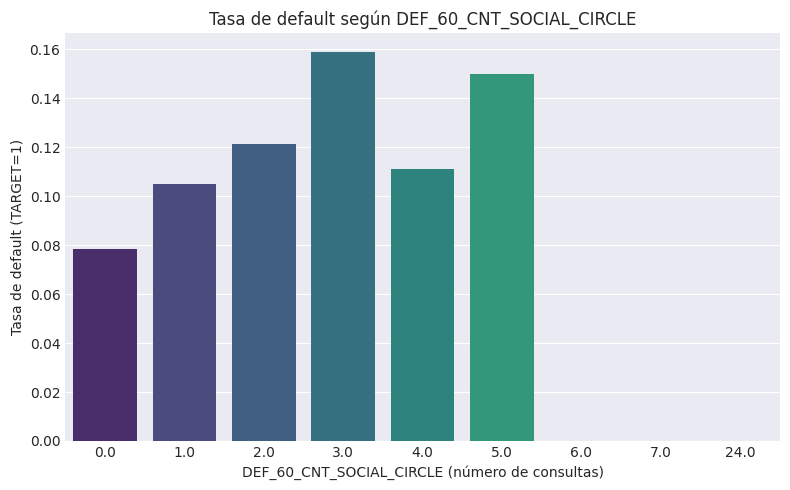

In [29]:
cols2 = [
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    ]

graficar_bureau_vs_target(df, columnas=cols2)